In [17]:
import numpy as np
import pandas as pd


In [18]:
df = pd.read_csv("Data/Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


#### Dropping Unnecessary feature

*If we look into the dataset, our dataset has an unnecessary attribute which is just used for counting here
*We'll drop the attribute from our dataset
*By printing info we came to know there are 30 records in our dataset and 2 columns or features

In [19]:
df = df.drop(['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


####  Printing Useful Stats of Our Dataset
*This will give us brief Information about where central point lies and how much disperse dataset we have

In [20]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


#### Visualizing the Dataset

*Visualizing the dataset gives us valuable information about the co-relation of YearsExperience and Salary
*The scatter graph below tells us that both attributes have positive relationship

Text(0, 0.5, 'Salary')

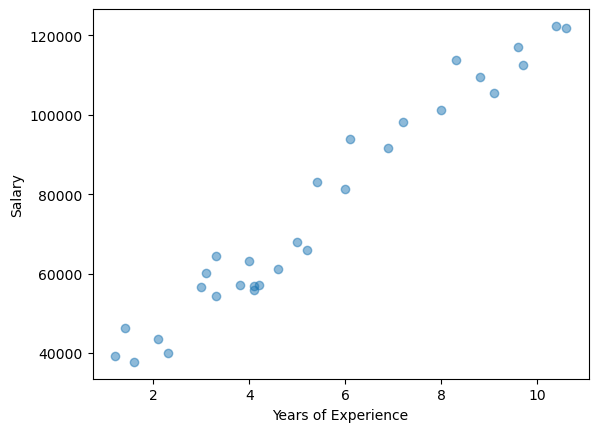

In [23]:
import matplotlib.pyplot as plt


plt.scatter(
    df.YearsExperience,
    df.Salary,
    alpha=0.5

)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

#### Visualize the Predictions with w and b

*If we plot a graph, this will give a line relationship which increase as the YearsExperiece increase

In [24]:
def estimated_salary(w, x, b):
    return w * x + b

w = 10
b = 60000

experience = df.YearsExperience
salary = estimated_salary(w, experience, b)
print(salary)

0     60012.0
1     60014.0
2     60016.0
3     60021.0
4     60023.0
5     60030.0
6     60031.0
7     60033.0
8     60033.0
9     60038.0
10    60040.0
11    60041.0
12    60041.0
13    60042.0
14    60046.0
15    60050.0
16    60052.0
17    60054.0
18    60060.0
19    60061.0
20    60069.0
21    60072.0
22    60080.0
23    60083.0
24    60088.0
25    60091.0
26    60096.0
27    60097.0
28    60104.0
29    60106.0
Name: YearsExperience, dtype: float64


Text(0, 0.5, 'Salary')

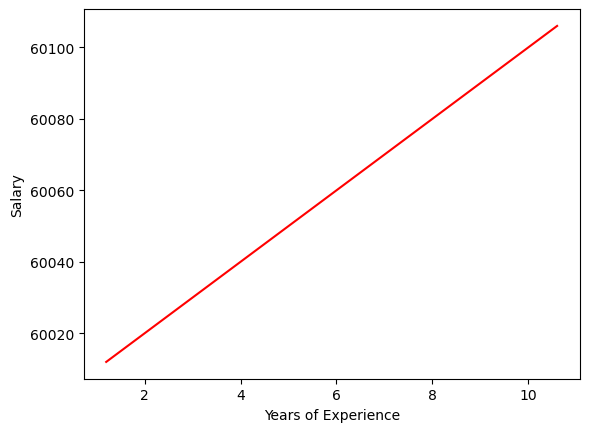

In [27]:
plt.plot(experience, salary, 'r')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

#### Visualizing the Predicted line over raw data

*Now if draw this line over the top of previous raw scattered graph data,we'll know that this line is not fitting the data correctly
*This is becuase we chose a random value for w and b

Text(0, 0.5, 'Salary')

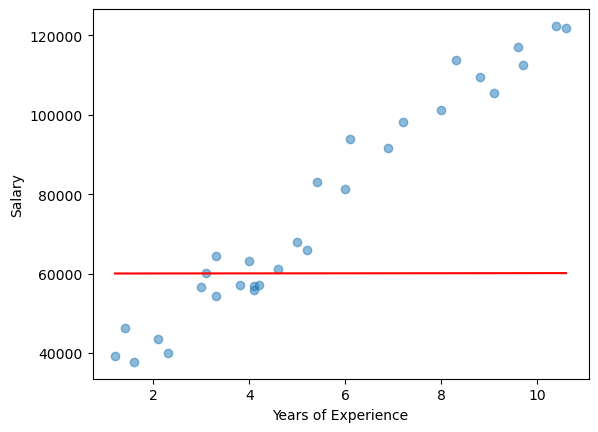

In [28]:
plt.plot(experience, salary, 'r')

plt.scatter(df.YearsExperience, df.Salary, alpha=0.5)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

#### Calculating the Loss

*Best way to find how far we are from correct predictions is to find the loss
*We'll define a function and calculate root mean squared loss
*RMSL or root mean square loss increase drastically if the loss is higher and gives a greater penalty

In [29]:
import numpy as np


def calculate_error(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

#### Training with Different Values of w and b

*Now let's define a function so that we can train our model with different values of w and b and we can see how line will fit the data

In [30]:
def try_parameters(w, b):
    sal = df.Salary
    exp = df.YearsExperience

    est_sal = estimated_salary(w, exp, b)

    plt.plot(exp, est_sal, 'r')

    plt.scatter(exp, sal, alpha=0.5)
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.legend(["Estimated", "Actual"])

    loss = calculate_error(sal, est_sal)
    print("Estimated loss: ", loss)

#### Calculate the Loss with Random Values of w and b

*At this point our loss is pretty higher and we know the reason as our line is not fitting the data correctly
*If we look into the graph we can estimate that our w needs to be much higher and our b needs to be slightly lower

Estimated loss:  31295.7968168251


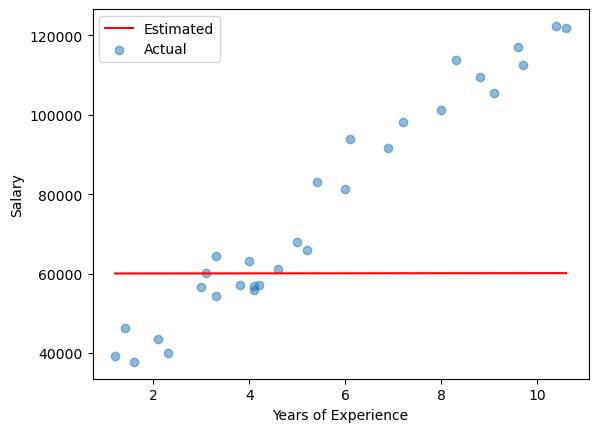

In [31]:
try_parameters(w, b)

#### Fitting Model with Good Values of w and b

*When it comes to values of w and b there are no absolute correct values
*Later we'll see our model finding these values for us
*I experimented a little and found these better values of w and b
*If we see now our loss is much lower than before and line is fitting the data

Estimated loss:  6043.306578355925


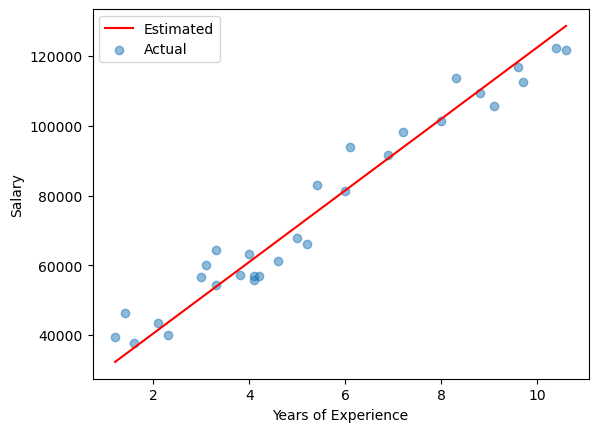

In [32]:
try_parameters(10250, 20000)

#### Making Predictions

*Now let's make predicitons with these two values of w and b
*As we can see our prediction is much closer to target values

In [33]:
print(estimated_salary(10250, 2, 20000))

40500


##### Using Predefined model from Sklearn

*We can use predefined Linear Regression model from Sklearn
*This model takes a 2d array as inputs so we need to convert our inputs into a 2d array

In [34]:
from sklearn.linear_model import LinearRegression

inputs = df[["YearsExperience"]]
targets = df.Salary
print(inputs.shape)
print(targets.shape)

(30, 1)
(30,)


#### Fitting and Predicting Values

In [35]:
model = LinearRegression()
model.fit(inputs, targets)
predictions = model.predict(inputs)
predictions

array([ 36188.15875227,  38078.15121656,  39968.14368085,  44693.12484158,
        46583.11730587,  53198.09093089,  54143.08716303,  56033.07962732,
        56033.07962732,  60758.06078805,  62648.05325234,  63593.04948449,
        63593.04948449,  64538.04571663,  68318.03064522,  72098.0155738 ,
        73988.00803809,  75878.00050238,  81547.97789525,  82492.9741274 ,
        90052.94398456,  92887.932681  , 100447.90253816, 103282.8912346 ,
       108007.87239533, 110842.86109176, 115567.84225249, 116512.83848464,
       123127.81210966, 125017.80457395])

#### Values of w and b

*We can get the values of w and b which the model used for making predictions
*If we look closely we used values pretty closed to these values of w and b

In [36]:
w = model.coef_
b = model.intercept_

print(w)
print(b)

[9449.96232146]
24848.203966523193


#### Calculating the Loss

It also gives loss pretty close to what we calculated

In [37]:
calculate_error(targets, predictions)

5592.04360876066

#### Training Custom Model with these values of w and b

*Now let's use our custom model and train it with these values of w and b
*This will gives us the idea where LinearRegression from Sklearn fits the line
*We can see the line almost looks the same and loss is slightly higher to what we calculated with our own w and b

Estimated loss:  5592.04360876066


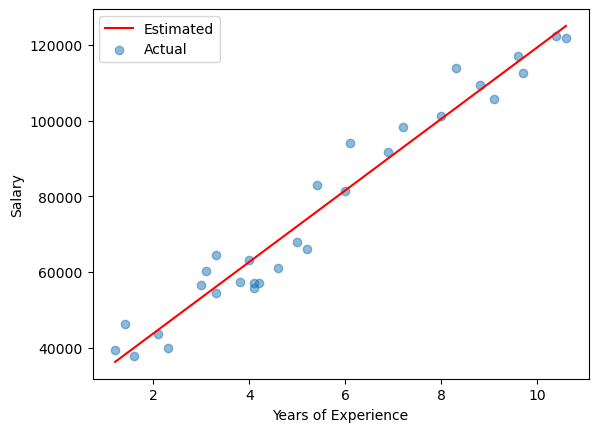

In [38]:
try_parameters(w, b)

#### Making a Random Prediction

*If you remember we make prediction with our cutom model using YearsExperience value as 2 and got Salary value as 40500
*LinearRegression from Sklearn predicts Salary as 43748.12860943 when given 2 as value for YearsExperience which is pretty close as well

In [39]:
model.predict([[2]])

C:\Users\shimu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([43748.12860943])